# <font color=darkblue> Machine Learning model deployment with Flask framework</font>

## <font color=Blue>Used Cars Price Prediction Application</font>

### Objective:
1. To build a Machine learning regression model to predict the selling price of the used cars based on the different input features like fuel_type, kms_driven, type of transmission etc.
2. Deploy the machine learning model with the help of the flask framework.

### Dataset Information:
#### Dataset Source: https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho?select=CAR+DETAILS+FROM+CAR+DEKHO.csv
This dataset contains information about used cars listed on www.cardekho.com
- **Car_Name**: Name of the car
- **Year**: Year of Purchase
- **Selling Price (target)**: Selling price of the car in lakhs
- **Present Price**: Present price of the car in lakhs
- **Kms_Driven**: kilometers driven
- **Fuel_Type**: Petrol/diesel/CNG
- **Seller_Type**: Dealer or Indiviual
- **Transmission**: Manual or Automatic
- **Owner**: first, second or third owner


### 1. Import required libraries

In [1]:
## importing libraries 
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import accuracy_score, r2_score
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

import pickle

### 2. Load the dataset

In [2]:
## Reading the dataset 'loan_approval_data.csv'
try:
    df = pd.read_csv('car+Data.csv')
except FileNotFoundError: # if file path is invalid of the file does not exist
    print("File not found.")
except pd.errors.EmptyDataError: # if the file is empty or has no data
    print("No data")
except pd.errors.ParserError: # if the file has malformed or invalid data that cannot be parsed.
    print("Parse error")
except UnicodeDecodeError: # if the file has a different encoding than the default or specified one.
    print("Encoding error")
except Exception: # handling other exceptions
    print("Error encountered! Please review your code")

In [3]:
##Fetching first few rows to verify the dataset has loaded
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


### 3. Check the shape and basic information of the dataset.

In [4]:
## Checking the shape of dataset
df.shape

(301, 9)

- 301 rows
- 9 columns

In [5]:
## Information of whole dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


**Observations:**

   - There are 301 rows and 9 columns
   - The columns include various data types such as integer, float and object
   - There is no missing data.
   - The DataFrame contains information related Used Cars Price Prediction Application, including attributes like Car_Name, Year, Selling_Price, Present_Price, Kms_Driven, and various skill-related attributes.
   - Some columns like 'Car_Name', 'Fuel_Type','Seller_Type','Transmission' is in string format and required conversion to numeric column for analysis.

### 4. Check for the presence of the duplicate records in the dataset? If present drop them

In [6]:
## the number of duplicated records in the dataset
df.duplicated().sum()

2

- Two records are duplicated

In [7]:
# Identifying duplicated records
duplicate_records = df[df.duplicated()]

# Checking if there are any duplicate records
if not duplicate_records.empty:
    # If duplicates are found, inform the user and proceed to drop them
    print("Duplicate records found. Dropping duplicates...")
    
    # Dropping duplicate records
    df = df.drop_duplicates(keep='first')
    
    # Informing the user that duplicates have been dropped and providing the updated shape of the data
    print("Duplicates dropped. Updated shape of the data:", df.shape)
else:
    # If no duplicate records are found, inform the user
    print("No duplicate records found.")

Duplicate records found. Dropping duplicates...
Duplicates dropped. Updated shape of the data: (299, 9)


### 5. Drop the columns which you think redundant for the analysis.

In [9]:
## dropping the redundant columns owner
df.drop('Car_Name', axis=1,inplace=True)

### 6. Extract a new feature called 'age_of_the_car' from the feature 'year' and drop the feature year

In [10]:
##lets check what is the 'year' column
df['Year']

0      2014
1      2013
2      2017
3      2011
4      2014
       ... 
296    2016
297    2015
298    2009
299    2017
300    2016
Name: Year, Length: 299, dtype: int64

In [11]:
## Calculating age using 'Year' :: current-year - given-year and Dropping the 'Year' column
from datetime import date

df['age_of_the_car'] = date.today().year - df['Year']
df.drop('Year',axis=1,inplace=True)

df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,age_of_the_car
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,10


### 7. Encode the categorical columns

In [12]:
## Checking categorical column in dataframe
cat_columns = df.select_dtypes('O')
cat_columns.head(3)

,Fuel_Type,Seller_Type,Transmission
0,Petrol,Dealer,Manual
1,Diesel,Dealer,Manual
2,Petrol,Dealer,Manual


In [13]:
## Printing the unique value counts of each records
print(df['Fuel_Type'].unique())
print(df['Seller_Type'].unique())
print(df['Transmission'].unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']


In [14]:
## perform label encoding for 'Object' type columns
le = LabelEncoder()

for i in cat_columns:
    df[i] = le.fit_transform(df[i])
    
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,age_of_the_car
0,3.35,5.59,27000,2,0,1,0,10
1,4.75,9.54,43000,1,0,1,0,11
2,7.25,9.85,6900,2,0,1,0,7
3,2.85,4.15,5200,2,0,1,0,13
4,4.60,6.87,42450,1,0,1,0,10


### 8. Separate the target and independent features.

In [15]:
## storing traget column 'Selling_Price' in variable Y and other independant features in variable X
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']

In [16]:
print('Independant Features : ')
X.head()

Independant Features : 


,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,age_of_the_car
0,5.59,27000,2,0,1,0,10
1,9.54,43000,1,0,1,0,11
2,9.85,6900,2,0,1,0,7
3,4.15,5200,2,0,1,0,13
4,6.87,42450,1,0,1,0,10


In [17]:
print('Target Feature : ')
y.head()

Target Feature : 


0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

### 9. Split the data into train and test.

In [18]:
## splitting the data
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=0)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(209, 7) (90, 7)
(209,) (90,)


### 10. Build a Random forest Regressor model and check the r2-score for train and test.

In [19]:
# Create a Random Forest Regressor
rf_regressor = RandomForestRegressor()

# Train the classifier
rf_regressor.fit(X_train,y_train)

# Prediction on test data
y_train_pred = rf_regressor.predict(X_train)
y_test_pred = rf_regressor.predict(X_test)

# Accuracy test for both train and test data
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Printing the r2 score both test and train 
print('r2_score train:',r2_train)
print('r2_score test',r2_test)

r2_score train: 0.9813695797063068
r2_score test 0.9019381048341197


### 11. Create a pickle file with an extension as .pkl

In [20]:
#saving model to disk
pickle.dump(rf_regressor,open('model.pkl','wb'))

# Loading the pickle file
model = pickle.load(open('model.pkl','rb'))

### 12. Create new folder/new project in visual studio/pycharm that should contain the "model.pkl" file *make sure you are using a virutal environment and install required packages.*

### a) Create a basic HTML form for the frontend

Create a file **index.html** in the templates folder and copy the following code.

### b) Create app.py file and write the predict function

**Copy the code below and paste it in 'app.py' in vs code.**

### 13. Run the app.py python file which will render to index html page then enter the input values and get the prediction.

### Run the app.py python file Using VS Code or CMD Prompt(Terminal)
#### Step 1: CMD Prompt 
 - run python app.py

#### Step 2: Run the Cell
  - Run the notebook cell containing the Flask application. This will start the Flask server within the notebook.
  
#### Step 5: Interact with the Form
  - Below the cell, you'll see a link like http://127.0.0.1:5000/. Click on it to open the form in your web browser. You can now enter input values, submit the form, and get the prediction displayed.

###  Attaching Screenshots of the prediction value acheived after running the program.

#### 1. Run the app.py python file

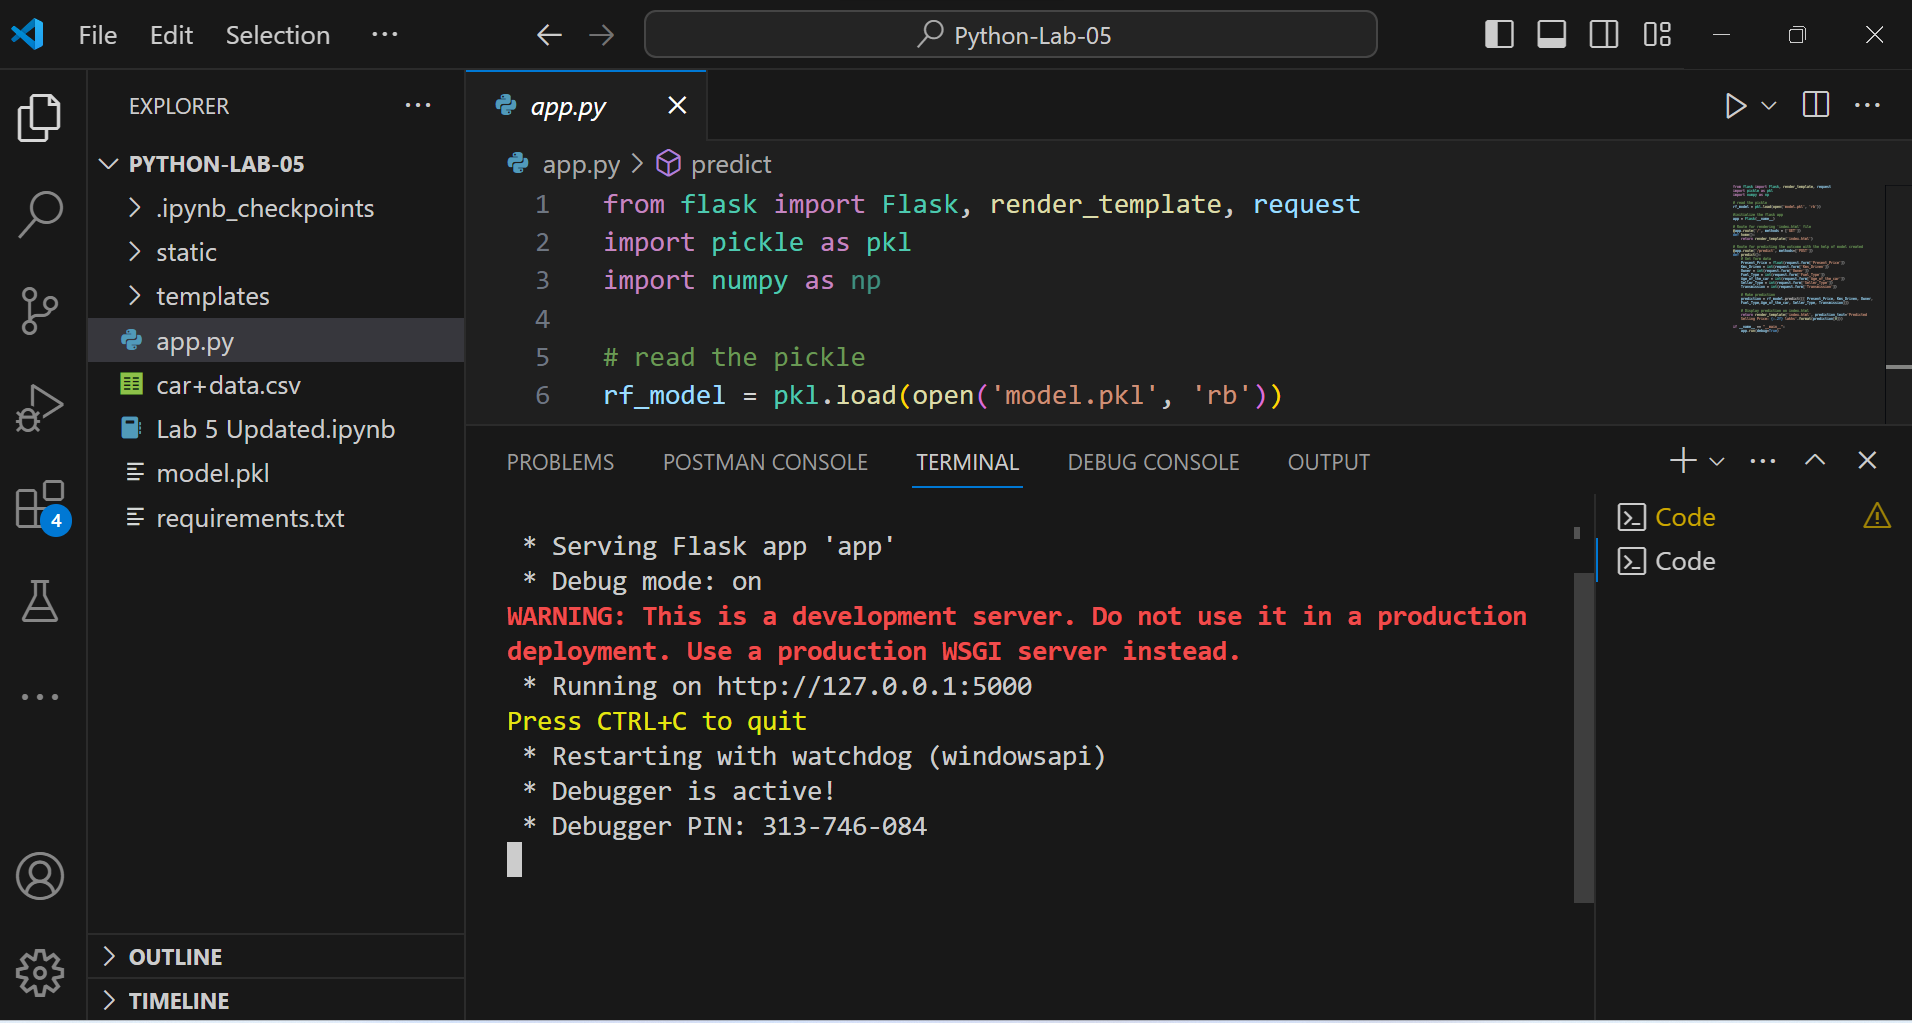

In [3]:
from IPython.display import Image
Image(filename='ss_recordings\Run_file_in_vs_code.png')

#### 2. render to index html page

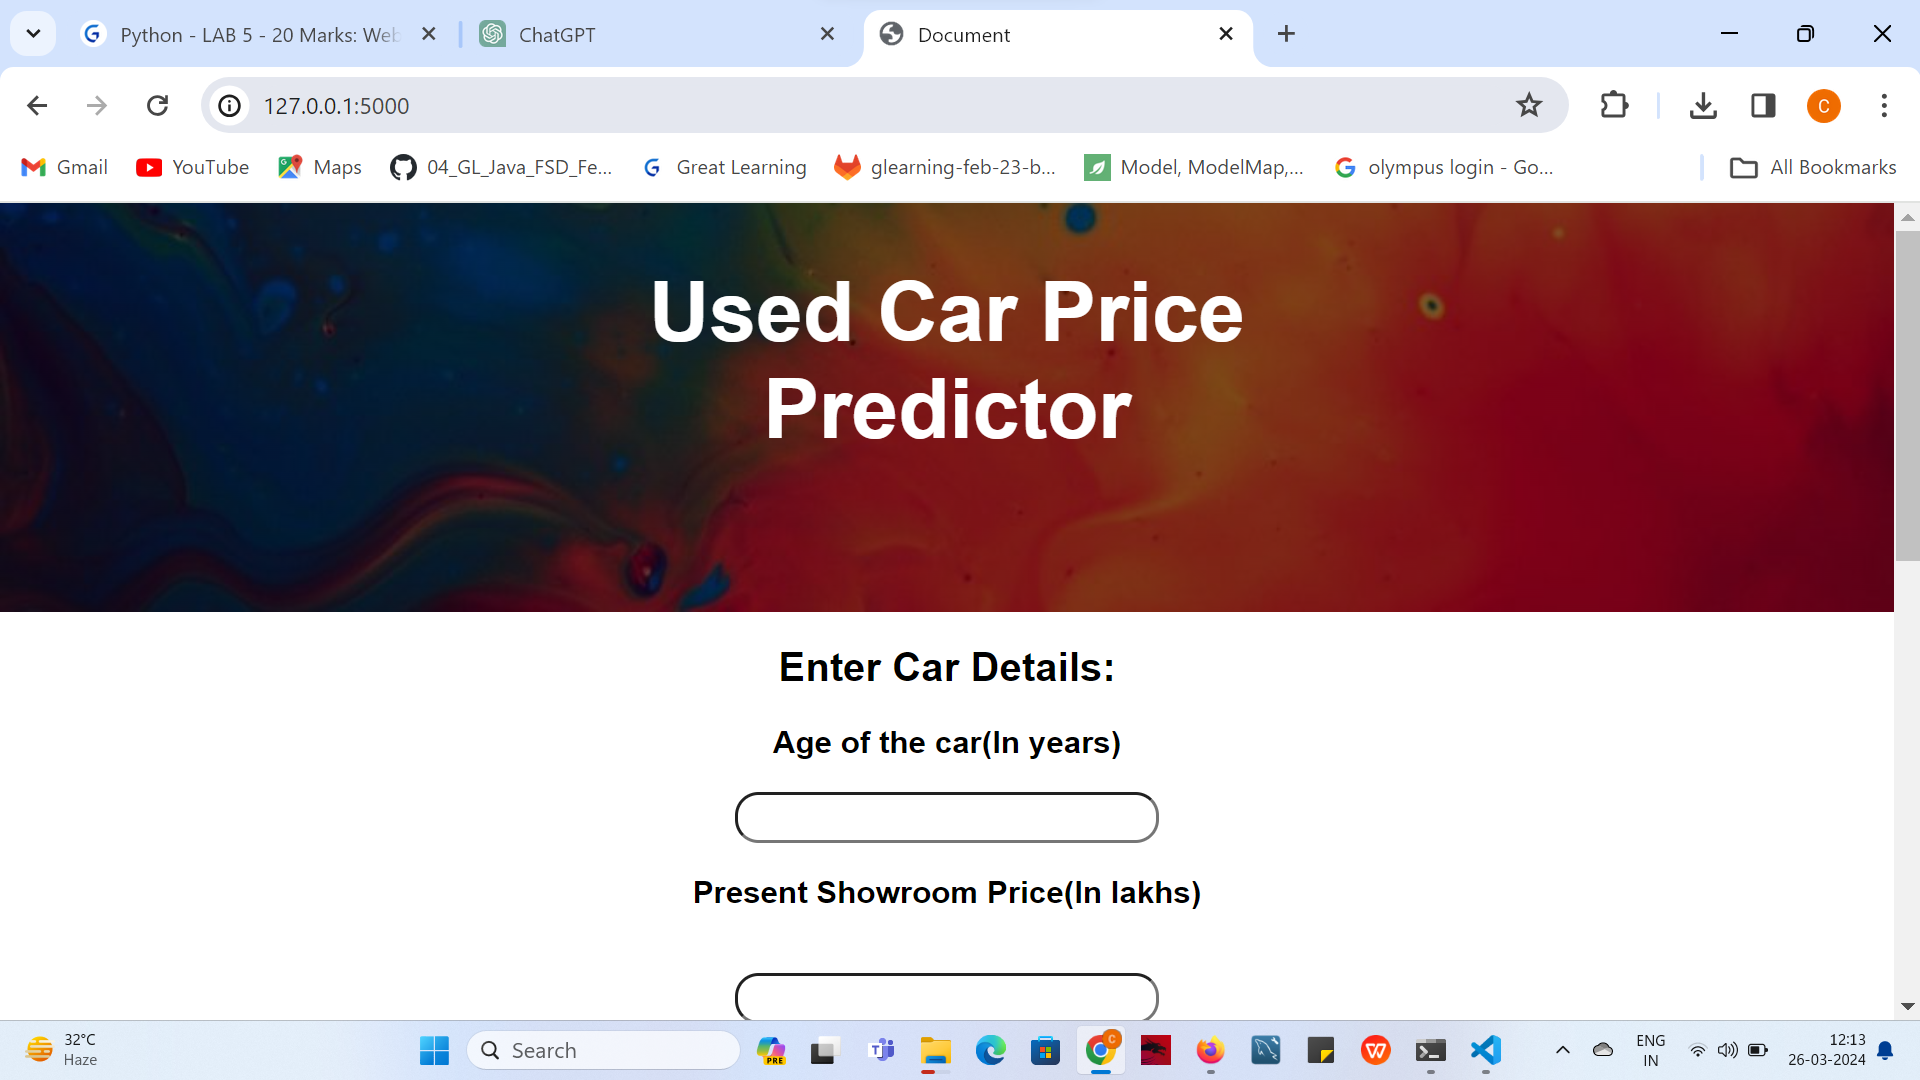

In [4]:
Image(filename='ss_recordings\Link_given_after_running_in_vs_code.png')

#### 3. Enter the input values

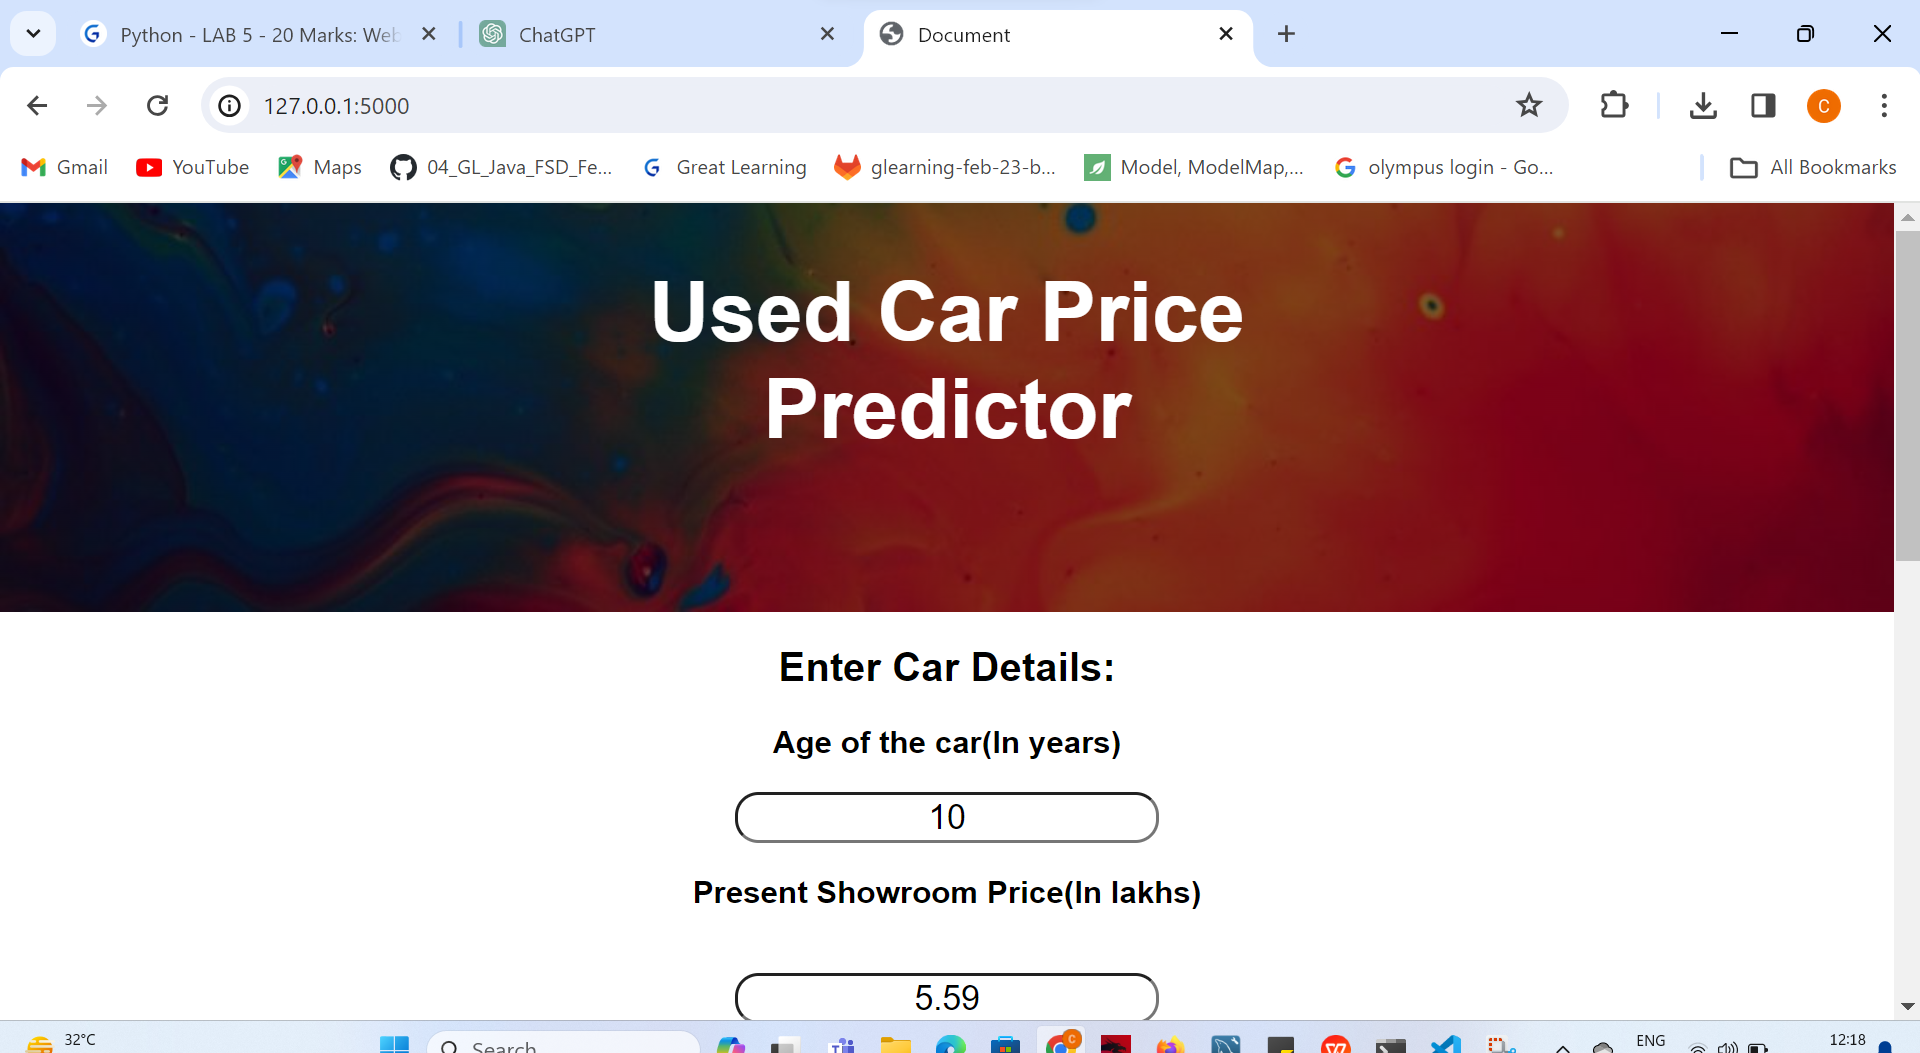

In [5]:
Image(filename='ss_recordings\enter_the_input_values.png')

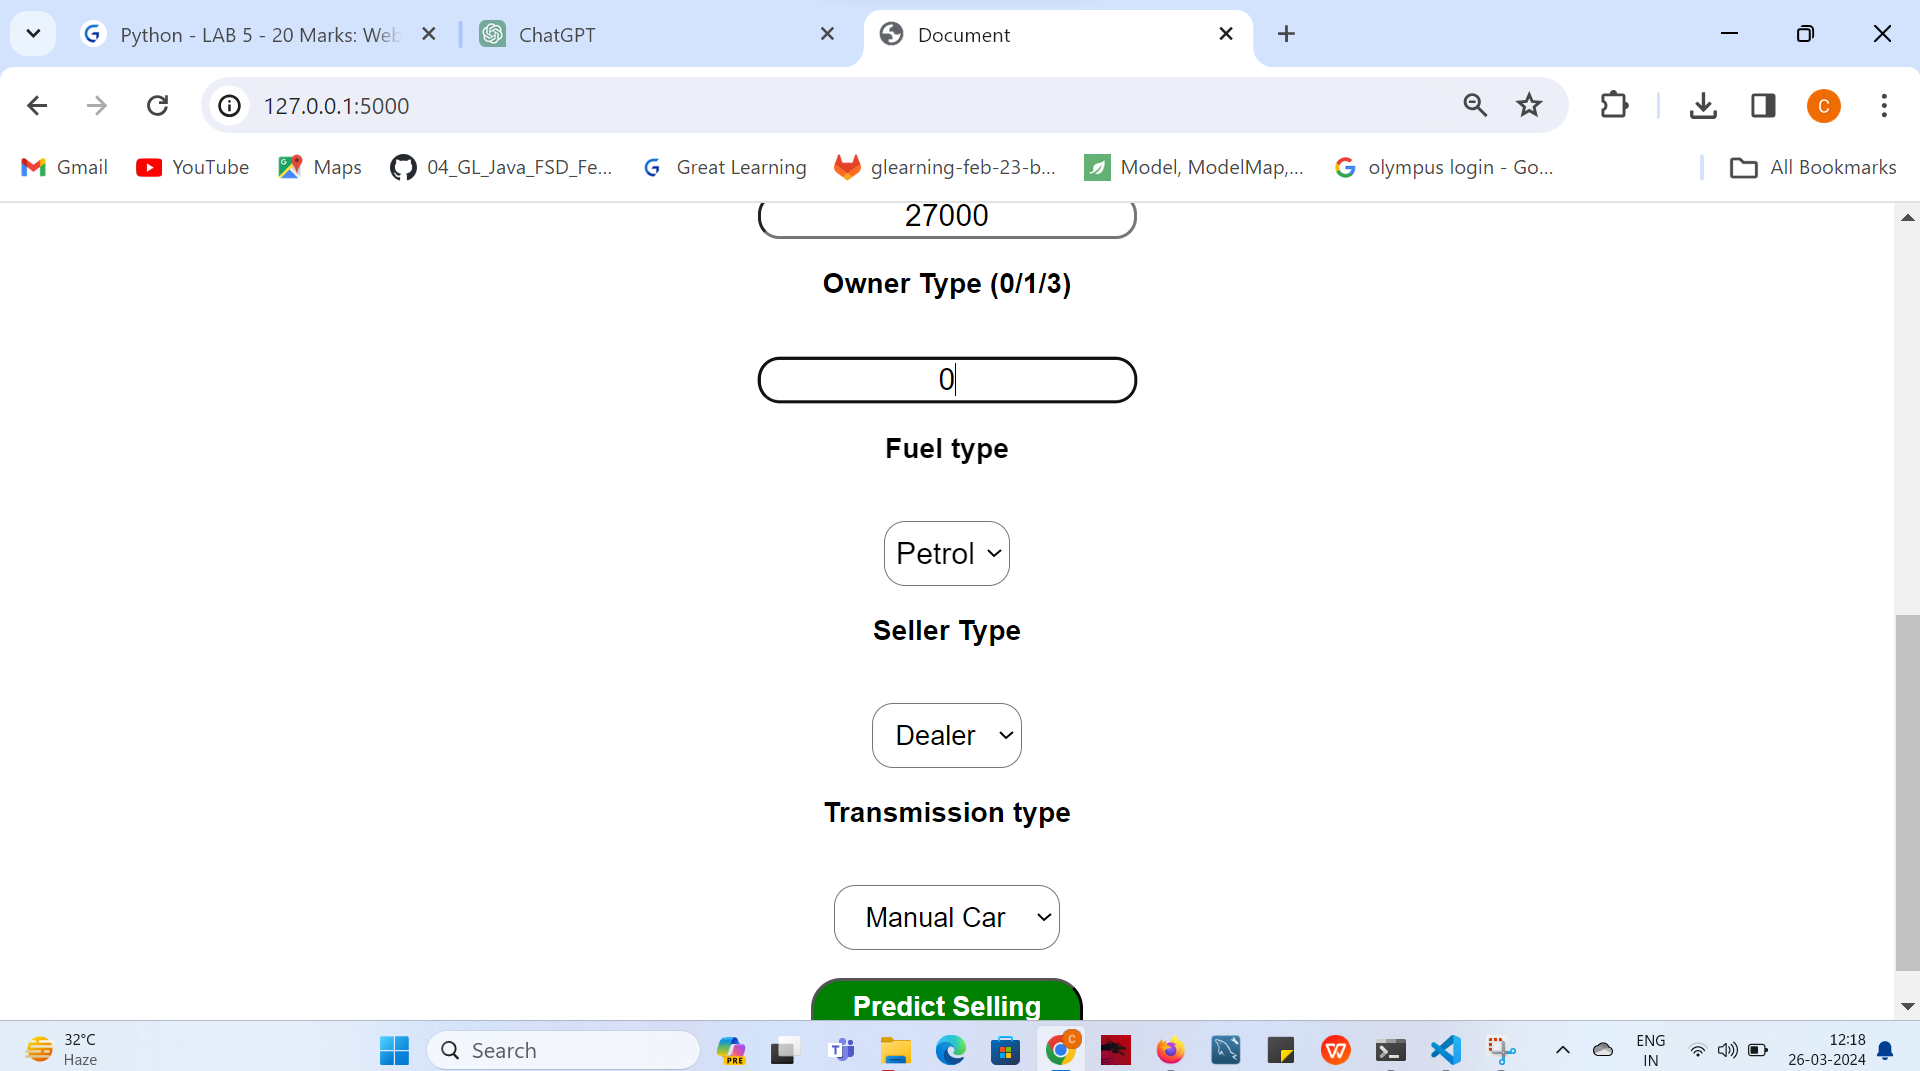

In [10]:
Image(filename='ss_recordings\enter_the_input_values (2).png')

#### 4. Get the prediction

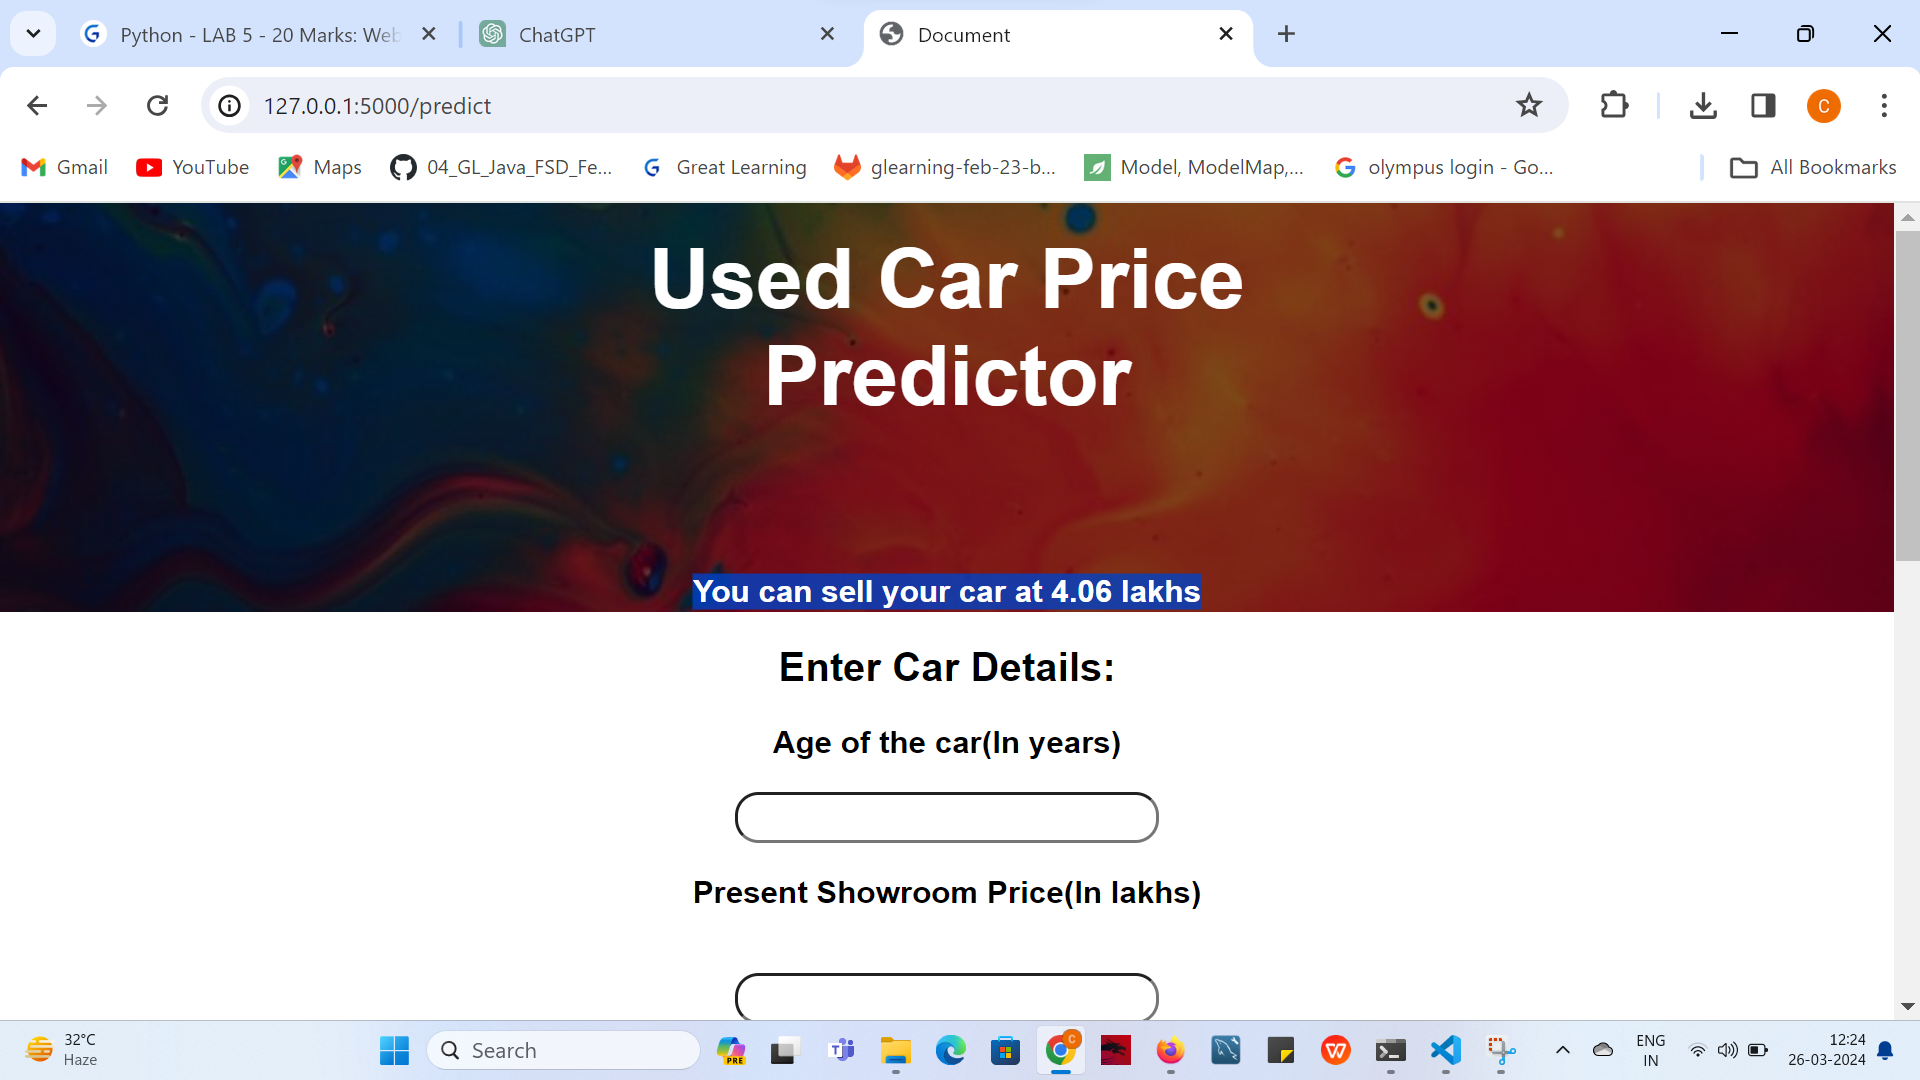

In [11]:
Image(filename='ss_recordings\getting_the_prediction.png')

#### 5. Working demo

- The recordings is available in the file directory 'ss_recordings'

### Happy Learning :)